GitHub Repository Link: https://github.com/LandonW0227/COMP-3800-Project-1

Link to GitHub profile: https://github.com/LandonW0227

Landon Walker Project #1 - MLB Umpire Scorecards

Dataset: https://www.kaggle.com/datasets/mattop/mlb-baseball-umpire-scorecards-2015-2022
(ONLY GOING TO USE DATA FROM 2022)

Description: This is a dataset with statistics on home plate umpire performance in MLB games over time. There is data on the specifics of each game measured along with data on home platea umpire accuracy and overall team favor. The statistics in this dataframe are calculated based on a computer model of what the actual strike zone should be on any particular batter in a game.

Main Inquiry Question:

Do MLB home plate umpires significantly impact the results of baseball games?

Inquiry Sub-Questions:

1. What is considered a well-umpired game in terms of accuracy?

2. Does the home team get favored more often by the home plate umpire?

3. In terms of total run impact, what proportion of baseball game results are considered to be impacted by home plate umpire performance?

4. How many umpires make up the top tier of home plate umpire performance?

NOTE: I chose to include the numerical outliers because the variable relationships I explored were not significantly impacted by them.

In [3]:
#Uploading file into Google Colab along with needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving mlb-umpire-scorecard.csv to mlb-umpire-scorecard.csv


In [4]:
#Importing matplotlib and reading the csv file
from matplotlib import pyplot as plt
df = pd.read_csv('mlb-umpire-scorecard.csv')
df.head(10)

,id,date,umpire,home,away,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,correct_calls,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact
0,1,2022-11-05,Lance Barksdale,HOU,PHI,4,1,124,4,10,120,114,6,96.8,92,4.8,97.6,0.09,0.75
1,2,2022-11-03,Jordan Baker,PHI,HOU,2,3,149,6,7.4,143,141.6,1.4,96,95,0.9,97.3,-0.12,0.58
2,3,2022-11-02,Tripp Gibson,PHI,HOU,0,5,124,7,7.1,117,116.9,0.1,94.4,94.3,0.1,92.7,-0.1,0.56
3,4,2022-11-01,Dan Iassogna,PHI,HOU,7,0,140,5,6,135,134,1,96.4,95.7,0.7,92.9,0.63,0.73
4,5,2022-10-29,Pat Hoberg,HOU,PHI,5,2,129,0,8.7,129,120.3,8.7,100,93.2,6.8,96.1,0,0
5,6,2022-10-28,James Hoye,HOU,PHI,5,6,173,10,11.8,163,161.2,1.8,94.2,93.2,1,91.9,0.13,0.85
6,7,2022-10-23,Quinn Wolcott,PHI,SD,4,3,132,4,8.1,128,123.9,4.1,97,93.9,3.1,95.5,0.09,0.49
7,8,2022-10-23,Adrian Johnson,NYY,HOU,5,6,164,8,9.7,156,154.3,1.7,95.1,94.1,1,90.9,1.02,1.38
8,9,2022-10-22,Alfonso Marquez,NYY,HOU,0,5,158,9,8.8,149,149.2,-0.2,94.3,94.4,-0.1,96.2,0.55,1.27
9,10,2022-10-22,Adam Hamari,PHI,SD,10,6,144,8,8.4,136,135.6,0.4,94.4,94.1,0.3,96.5,0.43,0.79


In [5]:
#Overview of the DataFrame
print("shape", df.shape)
print("Column Headers\n", df.columns.tolist())
print(df.dtypes)
print(df.head(10))
print(df.tail(10))

shape (18213, 19)
Column Headers
 ['id', 'date', 'umpire', 'home', 'away', 'home_team_runs', 'away_team_runs', 'pitches_called', 'incorrect_calls', 'expected_incorrect_calls', 'correct_calls', 'expected_correct_calls', 'correct_calls_above_expected', 'accuracy', 'expected_accuracy', 'accuracy_above_expected', 'consistency', 'favor_home', 'total_run_impact']
id                               int64
date                            object
umpire                          object
home                            object
away                            object
home_team_runs                   int64
away_team_runs                   int64
pitches_called                  object
incorrect_calls                 object
expected_incorrect_calls        object
correct_calls                   object
expected_correct_calls          object
correct_calls_above_expected    object
accuracy                        object
expected_accuracy               object
accuracy_above_expected         object
consistency     

In [25]:
#Removing unwanted rows
df.drop(df[df["id"] >= 2472].index, inplace=True, axis=0)
print(df)

        id        date           umpire home away  home_team_runs  \
0        1  2022-11-05  Lance Barksdale  HOU  PHI               4   
1        2  2022-11-03     Jordan Baker  PHI  HOU               2   
2        3  2022-11-02     Tripp Gibson  PHI  HOU               0   
3        4  2022-11-01     Dan Iassogna  PHI  HOU               7   
4        5  2022-10-29       Pat Hoberg  HOU  PHI               5   
...    ...         ...              ...  ...  ...             ...   
2466  2467  2022-04-07     Mark Carlson  WSH  NYM               1   
2467  2468  2022-04-07      Jerry Layne  ATL  CIN               3   
2468  2469  2022-04-07        Ed Hickox  LAA  HOU               1   
2469  2470  2022-04-07    Larry Vanover  ARI   SD               4   
2470  2471  2021-11-02  Mike Muchlinski  HOU  ATL               0   

      away_team_runs pitches_called incorrect_calls expected_incorrect_calls  \
0                  1            124               4                       10   
1          

In [35]:
#Checking for null values
print(df.isnull().sum())
#Removing rows with null values
df.drop(df[df["pitches_called"] == "ND"].index, inplace=True, axis=0)
print(df)
#Checking to see if any umpire names are spelled incorrectly
print(df['umpire'].value_counts())
#Checking to make sure all team name abbreviations are uppercase
df['home'] = df['home'].str.upper()
df['away'] = df['away'].str.upper()
#Checking for duplicates
df.drop_duplicates(subset = ['id'], keep = 'last')
print("shape", df.shape)

id                              0
date                            0
umpire                          0
home                            0
away                            0
home_team_runs                  0
away_team_runs                  0
pitches_called                  0
incorrect_calls                 0
expected_incorrect_calls        0
correct_calls                   0
expected_correct_calls          0
correct_calls_above_expected    0
accuracy                        0
expected_accuracy               0
accuracy_above_expected         0
consistency                     0
favor_home                      0
total_run_impact                0
dtype: int64
        id        date           umpire home away  home_team_runs  \
0        1  2022-11-05  Lance Barksdale  HOU  PHI               4   
1        2  2022-11-03     Jordan Baker  PHI  HOU               2   
2        3  2022-11-02     Tripp Gibson  PHI  HOU               0   
3        4  2022-11-01     Dan Iassogna  PHI  HOU               7

In [27]:
#Describing the data to find column mean values
print(df.describe())

                id  home_team_runs  away_team_runs     accuracy   favor_home  \
count  2466.000000     2466.000000     2466.000000  2466.000000  2466.000000   
mean   1236.656529        4.310624        4.238848    93.811638     0.024165   
std     713.584906        3.030746        3.172800     2.274615     0.573168   
min       1.000000        0.000000        0.000000    85.100000    -2.500000   
25%     619.250000        2.000000        2.000000    92.400000    -0.310000   
50%    1236.500000        4.000000        4.000000    93.900000     0.015000   
75%    1854.750000        6.000000        6.000000    95.400000     0.350000   
max    2471.000000       21.000000       28.000000   100.000000     3.200000   

       total_run_impact  
count       2466.000000  
mean           1.241999  
std            0.645820  
min            0.000000  
25%            0.780000  
50%            1.140000  
75%            1.590000  
max            6.020000  


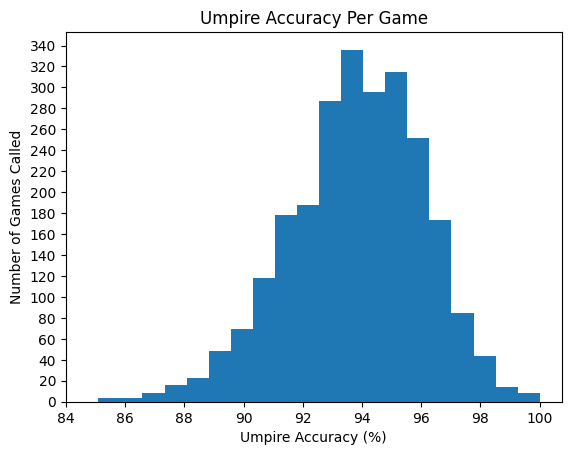

In [28]:
#Histogram for umpire accuracy data
plt.hist(df['accuracy'], 20)  # 25 is the number of bins
plt.title('Umpire Accuracy Per Game')
plt.xlabel('Umpire Accuracy (%)')
plt.ylabel('Number of Games Called')
plt.yticks(np.arange(0, 360, 20))  # the numbers on the y axis
plt.xticks([84,86,88,90,92,94,96,98,100])  # the numbers on the x axis
plt.show()  # show the plot

Graph #1 Interpretation:

Based on the histogram above, the average accuracy of a home plate umpire on ball/strike calls in any particular game is around 94%. There are occasional games where the umpire is particular bad or extraordinarily good, but most of the time, the home plate umpire is calling about 19 out of every 20 pitches correctly. This is a really good percentage in terms of how a baseball game plays out because umpires seem to be missing only about 1 call per half inning. Unless this missed call comes on the most important pitch of the inning,

In [29]:
#Creating a pivot table to see the accuracy values for the home plate umpire of each game
df['total_run_impact'] = pd.to_numeric(df['total_run_impact'], errors='coerce')
table = pd.pivot_table(df, index = ['umpire'], values= 'total_run_impact', aggfunc="mean")
print(table)
print(df.describe())

                total_run_impact
umpire                          
Adam Beck               1.172424
Adam Hamari             0.992727
Adrian Johnson          1.464687
Alan Porter             1.317333
Alex MacKay             1.140000
...                          ...
Todd Tichenor           1.187308
Tom Hallion             1.619000
Tripp Gibson            1.071212
Vic Carapazza           1.229333
Will Little             1.111333

[96 rows x 1 columns]
                id  home_team_runs  away_team_runs     accuracy   favor_home  \
count  2466.000000     2466.000000     2466.000000  2466.000000  2466.000000   
mean   1236.656529        4.310624        4.238848    93.811638     0.024165   
std     713.584906        3.030746        3.172800     2.274615     0.573168   
min       1.000000        0.000000        0.000000    85.100000    -2.500000   
25%     619.250000        2.000000        2.000000    92.400000    -0.310000   
50%    1236.500000        4.000000        4.000000    93.900000     

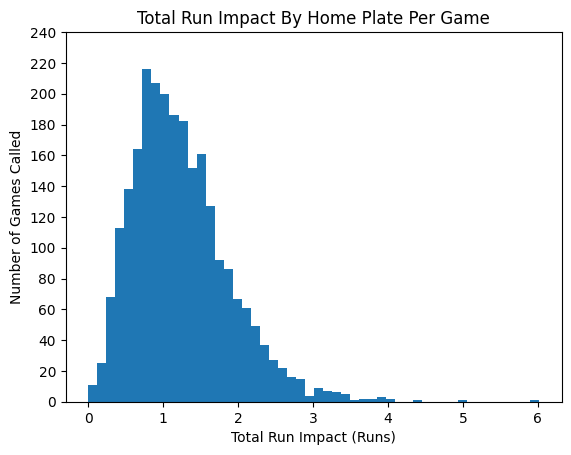

In [30]:
#Histogram for umpire accuracy data
plt.hist(df['total_run_impact'], 50)  # 25 is the number of bins
plt.title('Total Run Impact By Home Plate Per Game')
plt.xlabel('Total Run Impact (Runs)')
plt.ylabel('Number of Games Called')
plt.yticks(np.arange(0, 260, 20))  # the numbers on the y axis
#plt.xticks(0, 5, 0.1)  # the numbers on the x axis
plt.show()  # show the plot

Graph #2 Interpretation:

Based on the histogram above, the total run impact of the home plate umpire on the average baseball game is around 0.8-1.2 runs. This is somewhat significant as this means that home plate umpires have some impact on most games that are played. However, this statistic is net positive calculation between the home team favor and the away team favor, so the numbers on this chart do not give us a meaningful answer as to whether or not the outcome of most games is impacted.

In [31]:
#Creating a pivot table to see the accuracy values for the home plate umpire of each game
df['favor_home'] = pd.to_numeric(df['favor_home'], errors='coerce')
table = pd.pivot_table(df, index = ['umpire'], values= 'favor_home', aggfunc="mean")
print(table)
print(df.describe())

                favor_home
umpire                    
Adam Beck        -0.049394
Adam Hamari       0.078182
Adrian Johnson    0.051563
Alan Porter      -0.174000
Alex MacKay       0.250000
...                    ...
Todd Tichenor     0.083462
Tom Hallion      -0.311000
Tripp Gibson      0.091212
Vic Carapazza    -0.265333
Will Little       0.142000

[96 rows x 1 columns]
                id  home_team_runs  away_team_runs     accuracy   favor_home  \
count  2466.000000     2466.000000     2466.000000  2466.000000  2466.000000   
mean   1236.656529        4.310624        4.238848    93.811638     0.024165   
std     713.584906        3.030746        3.172800     2.274615     0.573168   
min       1.000000        0.000000        0.000000    85.100000    -2.500000   
25%     619.250000        2.000000        2.000000    92.400000    -0.310000   
50%    1236.500000        4.000000        4.000000    93.900000     0.015000   
75%    1854.750000        6.000000        6.000000    95.400000   

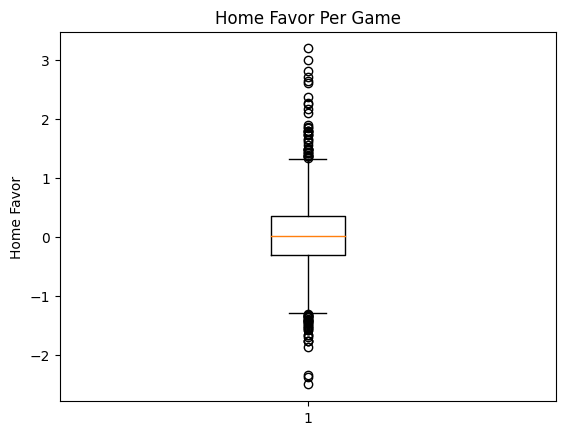

In [13]:
#Creating a box plot that displays the data in the home favor column
plt.boxplot(df['favor_home']) #data for the plot

plt.title('Home Favor Per Game')
plt.ylabel('Home Favor')

#plt.yticks(np.arange(0, 1.8, 0.2))  # the numbers on the y axis

#plt.tick_params(axis='x', which='major', labelsize=6)

plt.show()

Graph #3 Interpretation:

Based on the data in the pivot table and bar chart above, it turns out that home teams are not favored in a significantly impactful way by the home plate umpire in most baseball games. The average home team favor per game is around   0.02 runs, which is hardly noticeable in the context of a baseball game. Because the number is higher than zero, it can be said that home teams are favored by the home plate umpire slightly more often than road teams, but this number is not statistically significant. There are games where the home team is both significantly favored and significanlty hindered by the home plate umpire, but these games are natural and do not occur very often.

In [37]:
#Creating a pivot table to see the accuracy values for the home plate umpire of each game
df['accuracy'] = pd.to_numeric(df['accuracy'], errors='coerce')
table = pd.pivot_table(df, index = ['umpire'], values='accuracy', aggfunc="mean")
print(table)

                 accuracy
umpire                   
Adam Beck       94.560606
Adam Hamari     94.906061
Adrian Johnson  93.143750
Alan Porter     94.330000
Alex MacKay     94.050000
...                   ...
Todd Tichenor   94.196154
Tom Hallion     92.650000
Tripp Gibson    94.857576
Vic Carapazza   94.196667
Will Little     94.666667

[96 rows x 1 columns]


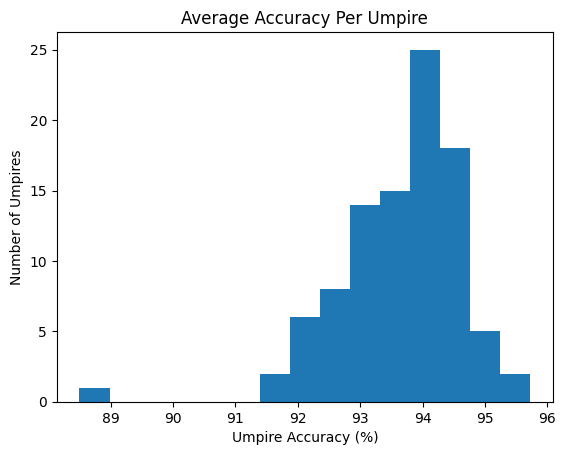

In [19]:
#Creating a bar plot to show average accuracy per umpire
plt.hist(table, 15) #data for the plot
plt.title('Average Accuracy Per Umpire')
plt.xlabel('Umpire Accuracy (%)')
plt.ylabel('Number of Umpires')
plt.show()

Graph #4 Interpretation:

Based on the data in the histogram above, the umpires with the highest average accuracy have averages around or even above 95%. The umpire with the highest average accuracy is Pat Hoberg, likely because he is the only umpire to call a perfect game with 100% accuracy since umpire scorecards starting being tracked. Theoretically, these are the umpires that have the least amount of impact on the outcome of MLB games. There is one umpire that has a particular bad accuracy percentage, but this individual only umpired one game, which happened to be bad.

Summary and Potential Future Exploration:

Based on the analysis performed above, it seems as if MLB umpires are really good at their job most of the time. The analysis failed to find any real correlation showing that home plate umpires impact the outcomes of MLB games. The data says that the total real umpire impact on the score of any particular baseball game is usually less than 1 run per game. The data says that most umpires are around 94% accurate, which means that they are getting most of the calls correct. The data also says that home teams are not favored significantly over road teams, contrary to one of the common beliefs amongst MLB fans. In a further exploration of this topic, the individual accuracy percentages of ball calls and strikes calls for each umpire would need to be studied. Addtionally, an exploration into the home plate umpire performance in the games of each individual team could be studied to determine which teams, if any, are favored more often.